# Analiza podjetij

V tej projektni nalogi bom analiziral najbogatejša podjetja na svetu. Podatke sem zajel na internetni strani [value.today](https://www.value.today/world-top-1000-companies-as-on-dec-25-2022?title=&field_headquarters_of_company_target_id=All&field_company_category_primary_target_id&field_market_cap_dec_25_2022__value=&page=0).  

In [265]:
import pandas as pd
pd.set_option('display.max_rows', 20)
%matplotlib inline
podjetja = pd.read_csv('obdelani_podatki/podjetja.csv',index_col='ime')

In [266]:
podjetja

,Sedež,Svetovni rang 2025,Tržna kapitalzicija Dec-25-2022 (Billion $),Svetovni rang Jan 2022,Tržna vrednost Jan 2022 (Billion $),Kategorija,Število zaposlenih,Letni dohodek (Million $),Neto dohodek (Million $)
ime,,,,,,,,,
APPLE,USA,1,2286.0,1.0,2825.0,Technology,164000.0,394330.0,99803.0
SAUDI ARABIAN OIL COMPANY (Saudi Aramco),Saudi Arabia,2,1841.0,3.0,1890.0,Energy,79800.0,400460.0,105380.0
MICROSOFT CORPORATION,USA,3,1780.0,2.0,2358.0,Technology,220000.0,198270.0,72738.0
ALPHABET,USA,4,1162.0,4.0,1820.0,Technology,190234.0,282840.0,59972.0
AMAZON.COM,USA,5,868.0,5.0,1649.0,eCommerce,1541000.0,513980.0,2722.0
...,...,...,...,...,...,...,...,...,...
CF INDUSTRIES HOLDINGS,USA,937,18.0,1365.0,15.0,Basic Materials,2700.0,11186.0,3346.0
WELLCARE HEALTH PLANS,USA,938,NaN,938.0,NaN,Healthcare,14000.0,NaN,NaN
CEZ A. S,Czech Republic,938,18.0,1031.0,20.0,Utilities,27200.0,9595.0,398.0


Najprej poglejmo, katera podjetja bodo napovedano najhitreje rasla.

In [267]:
podjetja['rast'] = podjetja['Svetovni rang Jan 2022'] - podjetja['Svetovni rang 2025']
podjetja.sort_values(by='rast',inplace= True,ascending=False)
podtabela = podjetja[['Sedež','rast']].copy()
print(podtabela.head(20))


                                                  Sedež    rast
ime                                                            
PT BAYAN RESOURCES TBK                        Indonesia  2396.0
E. I. DU PONT DE NEMOURS AND COMPANY                USA  2374.0
CENTRAIS ELETRICAS BRASILEIRAS - ELETROBRAS      Brazil  1277.0
TEXAS PACIFIC LAND TRUST                            USA  1061.0
WOODSIDE ENERGY GROUP                         Australia   942.0
AGNICO EAGLE MINES                               Canada   887.0
AKER BP ASA                                      Norway   823.0
DELTA ELECTRONICS (THAILAND) PUBLIC COMPANY    Thailand   718.0
EDISON INTERNATIONAL                                USA   717.0
TENARIS                                      Luxembourg   708.0
SOCIEDAD QUIMICA Y MINERA DE CHILE                Chile   695.0
STEEL DYNAMICS                                      USA   662.0
ENPHASE ENERGY                                      USA   654.0
VICI PROPERTIES                         

Sedaj si oglejmio še, katere države si lastijo največ korporacijskih gigantov.

<Axes: xlabel='Sedež'>

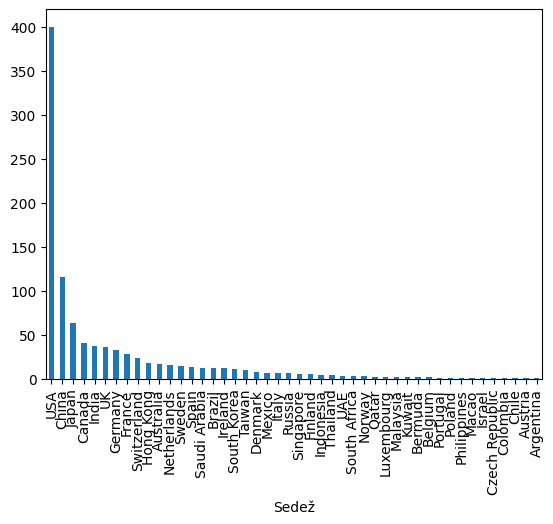

In [268]:
stevilo_podjetji_po_drzavah = podjetja.groupby(by=['Sedež']).size()
stevilo_podjetji_po_drzavah.sort_values(inplace= True,ascending=False)
stevilo_podjetji_po_drzavah.plot.bar()



Po teh podatkih lahko vidimo, kako si ena država lasti večino najmočnejših podjetij na svetu in posledično tudi drži gospodarski monopol v svetu.

<Axes: xlabel='Sedež'>

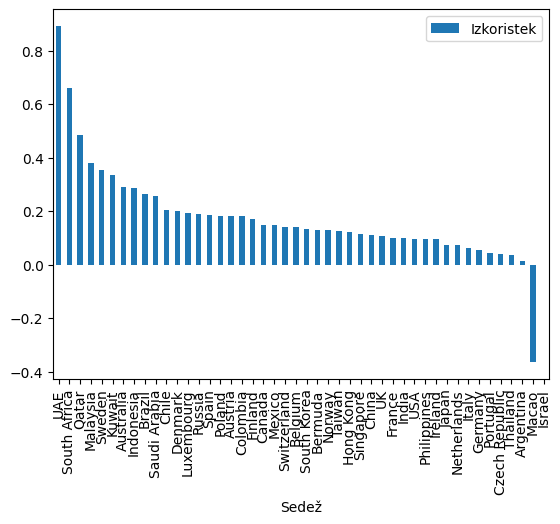

In [311]:
Letni_dohodek = podjetja.groupby(by='Sedež').agg({'Letni dohodek (Million $)': 'sum'})
Neto_dohodek = podjetja.groupby(by='Sedež').agg({'Neto dohodek (Million $)': 'sum'})
Letni_dohodek['Neto dohodek (Million $)'] = Neto_dohodek
Letni_dohodek['Izkoristek'] = Letni_dohodek['Neto dohodek (Million $)']/Letni_dohodek['Letni dohodek (Million $)']
Letni_dohodek.drop(columns=['Neto dohodek (Million $)'], inplace=True)
Letni_dohodek.drop(columns=['Letni dohodek (Million $)'], inplace=True)
Letni_dohodek.sort_values(by='Izkoristek',inplace= True,ascending=False)
Letni_dohodek.plot.bar()


Zelo dobro se vidi, da so največji izkoristki v energetskih državah. Seveda nas zanima, v kateri državi giganti v povprečju najhitreje rasejo, saj bi v primeru drugačne porazdelitve sedežev podjetji graf dajal vtis enakomernega svetovnega razvoja.

<Axes: xlabel='Sedež'>

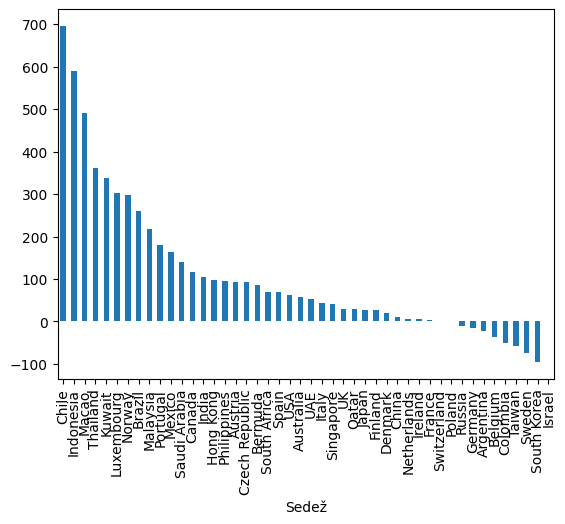

In [270]:
rast_podjetji_po_drzavah = podjetja.groupby(by='Sedež')['rast'].mean()
rast_podjetji_po_drzavah.sort_values(inplace= True,ascending=False)
rast_podjetji_po_drzavah.plot.bar()

Graf seveda pokaže visoko rast azijskega in južno ameriškega trga, kar je zelo pozitivna stvar, če želimo, da bo ekonomija po celem svetu enako močna. Seveda pa ni vse v moči držav, zelo zanimivo bi bilo videti, kolikšno je razmerje med tržno kapitalizacijo in številom zaposlenih.

<Axes: xlabel='Zaokrožena tržna kapitalizacija'>

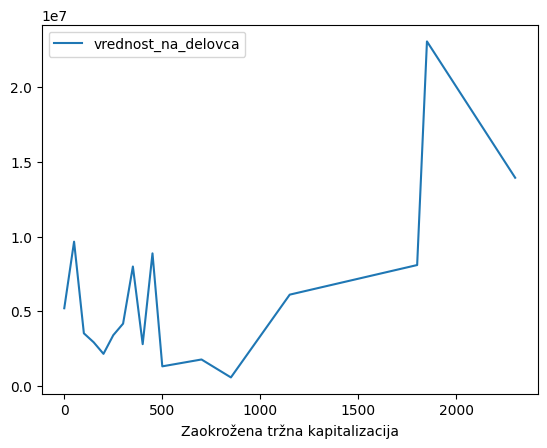

In [271]:
podjetja['vrednost_na_delovca'] = 1000000000*podjetja['Tržna kapitalzicija Dec-25-2022 (Billion $)']/podjetja['Število zaposlenih']
podjetja['Zaokrožena tržna kapitalizacija'] = round(podjetja['Tržna kapitalzicija Dec-25-2022 (Billion $)'] / 50) * 50
podtabela2 = podjetja[['Zaokrožena tržna kapitalizacija','vrednost_na_delovca']].copy()
podtabela2
podtabela2.groupby(by='Zaokrožena tržna kapitalizacija').agg({'vrednost_na_delovca':'mean'}).plot()

Pričakoval sem veliko večji razkorak, saj so vrednostni papirji najbogatejših podjetji bolje reklamirani. Sedaj si bomo ogledali koliko zaposlenih imajo podjetja glede na letni in neto dohodek.

<Axes: xlabel='Neto dohodek (Million $)', ylabel='Število zaposlenih'>

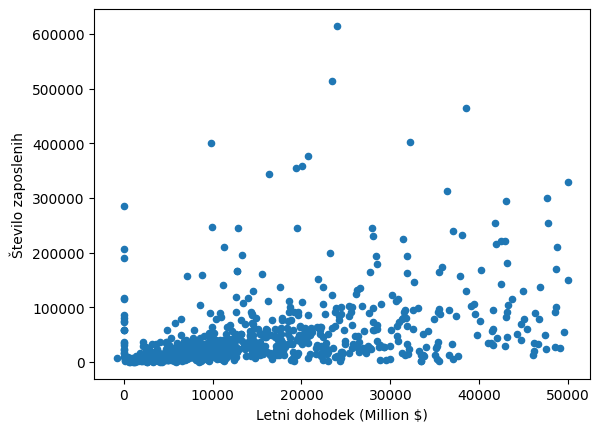

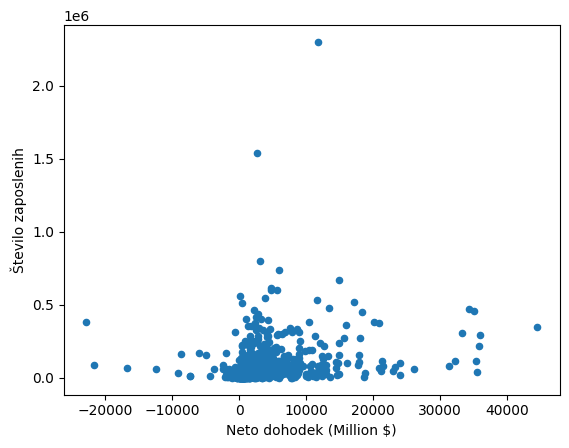

In [272]:
podjetja[podjetja['Letni dohodek (Million $)']<50000].plot.scatter('Letni dohodek (Million $)','Število zaposlenih')
podjetja[podjetja['Neto dohodek (Million $)']<50000].plot.scatter('Neto dohodek (Million $)','Število zaposlenih')

Zanimiva opazka je, da nekatera podjetja verjetno ne prikazujejo pravilno letnega dohodka, saj pri ničli nastane ravna črta, prav tako pa lahko opazimo, da bogatejša podjetja ne zaposljujejo veliko več zaposlenih. Pri drugem grafu se opazi, da je cilj podjetij ohraniti neto dohodek samo nad gladino, saj zaradi tega posledično plačajo manj davka. Sedaj bomo analizirali še dobičke glede na Kategorijo podjetij, torej katera panoga prinaša največji dubiček Neto/Bruto dohodek.

<Axes: xlabel='Kategorija'>

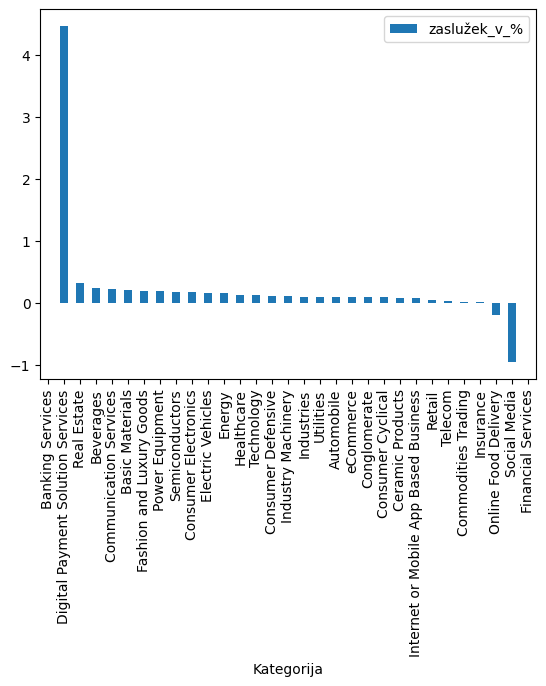

In [273]:

podjetja['zaslužek_v_%'] = podjetja['Neto dohodek (Million $)']/podjetja['Letni dohodek (Million $)']
podtabela3 = podjetja_znano2[['Kategorija','zaslužek_v_%']].copy()
povprecje_po_kategorijah = podtabela3.groupby(by='Kategorija').agg({'zaslužek_v_%':'mean'})
povprecje_po_kategorijah = povprecje_po_kategorijah.sort_values(by='zaslužek_v_%',ascending=False)
povprecje_po_kategorijah.plot.bar()


Torej najbolj profitne so naložbene in bančne storitve. Pri analizij podjetij bomo jih razvrstili glede na zaokroženo število delavcev in preverili, koliko podjetji ima določeno število zaposlenih. 

<Axes: xlabel='zaokroženo število zaposlenih'>

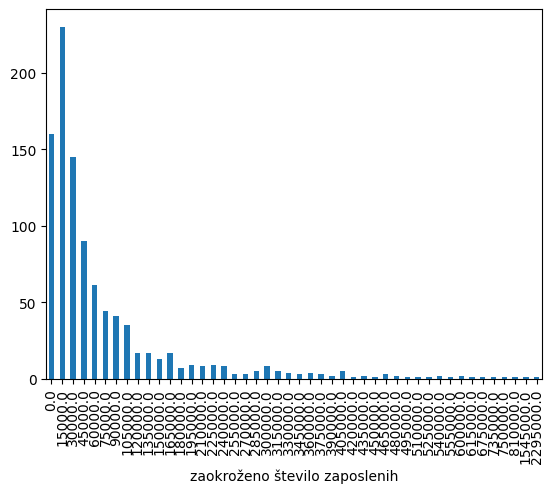

In [316]:
podjetja['zaokroženo število zaposlenih'] = round(podjetja['Število zaposlenih'] / 15000) * 15000
stevilo_podjetji_po_zaposlenih = podjetja.groupby(by=['zaokroženo število zaposlenih']).size()
stevilo_podjetji_po_zaposlenih.plot.bar()

Vidi se, da največ gigantov zaposljuje približno 15 000 zaposlenih.

# Zaključek

Pri analizi teh podatkov se mi je zdela še najbolj neverjetna prevlada ZDA, glede na pojavljanje Kitajske in njene gospodarske rasti v medijih in njihovo neverjetno rast so razlike med ZDA in Kitajsko še vedno ogromne. 